In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
  df=pd.read_csv("/content/drive/MyDrive/global_desi.csv")
  print('Data reading done successfully')
except pd.errors.ParserError as e:
  print(f"An error occurred while reading the file: {e}")

Data reading done successfully


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410125 entries, 0 to 410124
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_pseudo_id        410125 non-null  float64
 1   latest_activity_date  410125 non-null  int64  
 2   city                  398143 non-null  object 
 3   country               407068 non-null  object 
 4   continent             410125 non-null  object 
 5   region                402875 non-null  object 
 6   sub_continent         410125 non-null  object 
 7   metro                 410125 non-null  object 
 8   total_purchase_count  410125 non-null  int64  
 9   purchase_days         410125 non-null  int64  
 10  total_add_to_cart     410125 non-null  int64  
 11  total_begin_checkout  410125 non-null  int64  
 12  total_product_views   410125 non-null  int64  
 13  total_visits          410125 non-null  int64  
 14  event_types           410125 non-null  object 
 15  

In [ ]:
missing_vals=df.isnull().sum()
print(missing_vals)

user_pseudo_id               0
latest_activity_date         0
city                     11982
country                   3057
continent                    0
region                    7250
sub_continent                0
metro                        0
total_purchase_count         0
purchase_days                0
total_add_to_cart            0
total_begin_checkout         0
total_product_views          0
total_visits                 0
event_types                  0
total_events                 0
total_revenue           406188
dtype: int64


In [ ]:
print(df.loc[13651])

user_pseudo_id          1369098343.171783
latest_activity_date             20240609
city                                Delhi
country                             India
continent                            Asia
region                              Delhi
sub_continent               Southern Asia
metro                           (not set)
total_purchase_count                    0
purchase_days                           0
total_add_to_cart                       0
total_begin_checkout                    0
total_product_views                     0
total_visits                            0
event_types                view_item_list
total_events                           48
total_revenue                         NaN
Name: 13651, dtype: object


In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df.describe()

,user_pseudo_id,latest_activity_date,total_purchase_count,purchase_days,total_add_to_cart,total_begin_checkout,total_product_views,total_visits,total_events,total_revenue
count,4.101250e+05,4.101250e+05,410125.000000,410125.000000,410125.000000,410125.0,410125.000000,410125.0,410125.000000,3937.000000
mean,1.075171e+09,2.024038e+07,0.021669,0.010531,0.176844,0.0,2.516933,0.0,87.874219,5725.305309
std,6.201932e+08,1.431639e+02,0.319930,0.116177,1.400913,0.0,9.216577,0.0,276.359557,5896.661129
min,1.559417e+04,2.024012e+07,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,27.000000
25%,5.377008e+08,2.024030e+07,0.000000,0.000000,0.000000,0.0,0.000000,0.0,24.000000,2690.000000
50%,1.076878e+09,2.024041e+07,0.000000,0.000000,0.000000,0.0,1.000000,0.0,25.000000,4090.000000
75%,1.611104e+09,2.024051e+07,0.000000,0.000000,0.000000,0.0,2.000000,0.0,75.000000,6580.000000
max,2.147482e+09,2.024061e+07,34.000000,11.000000,287.000000,0.0,1478.000000,0.0,37679.000000,107989.000000


In [ ]:
# define condition 1
condition1=((df['city'].isnull()) & (df['country'].isnull()) & (df['region'].isnull()) & (df['metro']=='(not set)') & \
            (df['continent']=='(not set)') & (df['sub_continent']=='(not set)'))

count1=df[condition1].shape[0]

print('Number of rows to be dropped', count1)
# dropping rows meeting 1
df.drop(df[condition1].index, inplace=True)
#Checking count now
df['continent'].value_counts()
df['sub_continent'].value_counts()
df['metro'].value_counts()
df['country'].isnull().sum()

Number of rows to be dropped 3057


0

In [ ]:
# Defining the condition 2:
condition2=((df['city'].isnull()) & (df['region'].isnull()) & (df['metro']!='(not set)'))
rows2=df[condition2]
print(rows2[['user_pseudo_id','city','region', 'metro']])
print('Number of row with condition 2:',rows2.shape[0])
# Imputing the values accordingly
rows2.loc[:,'city']=rows2['metro']
rows2.loc[:,'region']=rows2['metro']
print ('After imputation', rows2[['user_pseudo_id','city','region', 'metro']])
# updating the dataframe to make the change permanent
df.loc[condition2,'city']=rows2['city']
df.loc[condition2,'region']=rows2['region']
df['city'].value_counts()
df['region'].value_counts()
# change region to Washington, and city to washington
# Replace 'New York, NY' with 'New York' in the 'city' column & region as 'New York'too
df['city'] = df['city'].replace('New York, NY', 'New York')
df['region'] = df['region'].replace('New York, NY', 'New York')

df['city']=df['city'].replace('Washington DC (Hagerstown MD)','Washington')
df['region']=df['region'].replace('Washington DC (Hagerstown MD)','Washington')

        user_pseudo_id city region         metro
225676    1.328734e+09  NaN    NaN  New York, NY
Number of row with condition 2: 1
After imputation         user_pseudo_id          city        region         metro
225676    1.328734e+09  New York, NY  New York, NY  New York, NY


In [ ]:
condition3=((df['city'].isna()) & (df['metro']!='(not set)'))
rows3=df[condition3]
print(rows3[['user_pseudo_id','city','metro','region']])
print ('count of rows following condition 3:',rows3.shape[0])
# imputing
rows3.loc[:,'city']=rows3['metro']

print("\nSelected Rows (After Imputation):")
print(rows3[['city', 'metro']])
# Update the original DataFrame with the imputed values
df.loc[condition3, 'city'] = rows3['city']
# Get the unique rows based on the 'city' column
unique_rows3 = rows3.drop_duplicates(subset='city')

# Print the unique rows
print("\nUnique Rows:")
print(unique_rows3[['user_pseudo_id', 'city']])

# Count the unique rows
count = unique_rows3.shape[0]
print(f"\nNumber of unique rows: {count}")

In [ ]:
# Changing values to match city columns:
df['city'] = df['city'].replace('West New York', 'New York')
df['city'] = df['city'].replace('Atlanta GA', 'Atlanta')
df['city'] = df['city'].replace('New York, NY', 'New York')
df['city']=df['city'].replace('Washington DC (Hagerstown MD)','Washington')
df['city'] = df['city'].replace('Los Angeles CA', 'Los Angeles')
df['city'] = df['city'].replace('Dallas-Ft. Worth TX', 'Dallas')
df['city'] = df['city'].replace('Chicago IL', 'Chicago')
df['city'] = df['city'].replace('Monterey-Salinas CA', 'Salinas')
df['city'] = df['city'].replace('San Francisco-Oakland-San Jose CA', 'San Jose')

df['city'] = df['city'].replace('Sacramento-Stockton-Modesto CA', 'Sacramento')
df['city'] = df['city'].replace('Tampa-St. Petersburg (Sarasota) FL', 'Tampa')
df['city'] = df['city'].replace('Columbia SC', 'Columbia')
df['city'] = df['city'].replace('Detroit MI', 'Detroit')
df['city'] = df['city'].replace('Philadelphia PA', 'Philadelphia')
df['city'] = df['city'].replace('Salt Lake City UT', 'Salt Lake City')
df['city'] = df['city'].replace('Cincinnati OH', 'Cincinnati')
df['city'] = df['city'].replace('Jacksonville FL', 'Jacksonville')
df['city'] = df['city'].replace('Alexandria LA', 'Alexandria LA')
df['city'] = df['city'].replace('Indianapolis IN', 'Indianapolis')
df['city'] = df['city'].replace('Syracuse NY', 'Syracuse')
df['city'] = df['city'].replace('Honolulu HI', 'Honolulu')
df['city'] = df['city'].replace('Wichita-Hutchinson KS', 'Wichita')
df['city'] = df['city'].replace('Missoula MT', 'Missoula')
df['city'] = df['city'].replace('Savannah GA', 'Savannah')
df['city'] = df['city'].replace('Monroe LA-El Dorado AR', 'Monroe')

df['city'] = df['city'].replace('Nashville TN', 'Nashville')
df['city'] = df['city'].replace('Tyler-Longview(Lufkin & Nacogdoches) TX', 'Tyler')
df['city'] = df['city'].replace('San Antonio TX', 'San Antonio')

df['city'] = df['city'].replace('Springfield MO', 'Springfield')
df['city'] = df['city'].replace('Louisville KY', 'Louisville KY')
df['city'] = df['city'].replace('Gainesville FL', 'Gainesville')
df['city'] = df['city'].replace('Roanoke-Lynchburg VA','Roanoke')

df['city'] = df['city'].replace('Bluefield-Beckley-Oak Hill WV','Oak Hill')
df['city'] = df['city'].replace('Paducah KY-Cape Girardeau MO-Harrisburg-Mount Vernon IL', '')
df['city'] = df['city'].replace('Elmira (Corning) NY', 'Elmira')
df['city'] = df['city'].replace('Milwaukee WI', 'Milwaukee')

df['city'] = df['city'].replace('Oklahoma City OK', 'Oklahoma City')
df['city'] = df['city'].replace('Meridian MS', 'Meridian')
df['city'] = df['city'].replace('Buffalo', 'Buffalo NY')
df['city'] = df['city'].replace('Memphis TN', 'Memphis')
df['city'] = df['city'].replace('Topeka KS', 'Topeka')

df['city'] = df['city'].replace('Albany-Schenectady-Troy NY', 'Albany')
df['city'] = df['city'].replace('Kansas City MO', 'Kansas City')
df['city'] = df['city'].replace('Cedar Rapids-Waterloo-Iowa City & Dubuque IA', 'Waterloo')
df['city'] = df['city'].replace('Harrisonburg VA', 'Harrisonburg')
df['city'] = df['city'].replace('Norfolk-Portsmouth-Newport News VA', 'Portsmouth')
df['city'] = df['city'].replace('Corpus Christi TX', 'Corpus Christi')
df['city'] = df['city'].replace('Charlotte NC', 'Charlotte')
df['city'] = df['city'].replace('Birmingham (Ann and Tusc) AL', 'Birmingham')

df['city'] = df['city'].replace('La Crosse-Eau Claire WI', 'La Crosse')

df['city'] = df['city'].replace('Albuquerque-Santa Fe NM', 'Albuquerque')
df['city'] = df['city'].replace('Fresno-Visalia CA', 'Visalia')
df['city']=df['city'].replace('Watertown NY','Watertown')
df['city']=df['city'].replace('Columbus OH','Columbus')
df['city']=df['city'].replace('Spokane WA','Spokane')
df['city']=df['city'].replace('Ft. Smith-Fayetteville-Springdale-Rogers AR','Fayetteville')
df['city']=df['city'].replace('Austin TX','Austin')
df['city']=df['city'].replace('Green Bay-Appleton WI','Appleton')
df['city']=df['city'].replace('Cleveland-Akron (Canton) OH','Cleveland')

df['city']=df['city'].replace('Shreveport LA','Shreveport')
df['city']=df['city'].replace('Burlington VT-Plattsburgh NY','Burlington')
df['city']=df['city'].replace('Columbus GA','Columbus')
df['city']=df['city'].replace('Grand Rapids-Kalamazoo-Battle Creek MI','Grand Rapids')
df['city']=df['city'].replace('Richmond-Petersburg VA','Richmond')

df['city']=df['city'].replace('Miami-Ft. Lauderdale FL','Miami')

df['city']=df['city'].replace('Sioux Falls(Mitchell) SD','Sioux Falls')
df['city']=df['city'].replace('Portland OR','Portland')
df['city']=df['city'].replace('Houston TX','Houston')
df['city']=df['city'].replace('Idaho Falls-Pocatello ID','Idaho Falls')
df['city']=df['city'].replace('Hartford & New Haven CT','New Haven')

df['city']=df['city'].replace('Minneapolis-St. Paul MN','Minneapolis')
df['city']=df['city'].replace('Boston MA-Manchester NH','Boston')
df['city']=df['city'].replace('Santa Barbara-Santa Maria-San Luis Obispo CA','Santa Barbara')

df['city']=df['city'].replace('Phoenix AZ','Phoenix')
df['city'] = df['city'].replace('Denver CO', 'Denver')
df['city'] = df['city'].replace('Baltimore MD', 'Baltimore')
df['city'] = df['city'].replace('St. Louis MO', ' St. Louis')
df['city'] = df['city'].replace('Pittsburgh PA', 'Pittsburgh')

df['city'] = df['city'].replace('Seattle-Tacoma WA', 'Seattle')
df['city'] = df['city'].replace('Pittsburgh PA', 'Pittsburgh')
df['city'] = df['city'].replace('Johnstown-Altoona-State College PA', 'Altoona')
df['city'] = df['city'].replace('Raleigh-Durham (Fayetteville) NC', 'Raleigh')

In [ ]:
condition4 = (df['city'].notnull()) & (df['region'].isnull())
selected_rows2 = df[condition4]

# Print the selected rows
print("Selected Rows:")
print(selected_rows2[['city', 'region', 'metro']])
# Count the selected rows
count = selected_rows2.shape[0]
print(f"\nNumber of selected rows with CITY not null but REGION null: {count}")
# Get the unique rows based on the 'city' column
unique_rows = selected_rows2.drop_duplicates(subset='city')

# Print the unique rows
print("Unique Rows:")
print(unique_rows[['city', 'region', 'country']])

# Count the unique rows
count = unique_rows.shape[0]
print(f"\nNumber of unique rows: {count}")

Selected Rows:
                                        city region      metro
88                                 Singapore    NaN  (not set)
644                                Singapore    NaN  (not set)
733                                Singapore    NaN  (not set)
784                                Singapore    NaN  (not set)
840                                Singapore    NaN  (not set)
1079                               Kathmandu    NaN  (not set)
1086                               Singapore    NaN  (not set)
1209                               Singapore    NaN  (not set)
1290                               Singapore    NaN  (not set)
1846                               Singapore    NaN  (not set)
1979                                    Male    NaN  (not set)
2473                               Singapore    NaN  (not set)
2628                               Singapore    NaN  (not set)
2859                               Kathmandu    NaN  (not set)
2864                               Reykj

In [ ]:
# Update the 'region' column for rows where 'city' is 'Kalapet'
df.loc[df['city'] == 'Kalapet', 'region'] = 'Puducherry'

# Print the updated rows
print("Updated Rows:")
print(df.loc[df['city'] == 'Kalapet', ['user_pseudo_id', 'city', 'region', 'metro']])
df.loc[(df['city'] == 'La Chorrera') & (df['country'] == 'Panama'), 'region'] = 'Panamá Oeste Province'

df.loc[(df['city'] == 'Singapore') & (df['country'] == 'Singapore'), 'region'] = 'Central Region'
df.loc[(df['city'] == 'Kathmandu') & (df['country'] == 'Nepal'), 'region'] = 'Bagmati Pradesh'
df.loc[(df['city'] == 'Male') & (df['country'] == 'Maldives'), 'region'] = 'Kaafu Atoll'
df.loc[(df['city'] == 'Reykjavik') & (df['country'] == 'Iceland'), 'region'] = 'Capital Region'
df.loc[(df['city'] == 'Antananarivo') & (df['country'] == 'Madagascar'), 'region'] = 'Analamanga Region'
df.loc[(df['city'] == 'Paramaribo') & (df['country'] == 'Suriname'), 'region'] = 'Paramaribo District'
df.loc[(df['city'] == 'Basseterre') & (df['country'] == 'St. Kitts & Nevis'), 'region'] = 'St. George Basseterre Parish'

df.loc[(df['city'] == 'Chaguanas Borough Corporation') & (df['country'] == 'Trinidad & Tobago'), 'region'] = 'Chaguanas Borough'
df.loc[(df['city'] == 'Arima Borough Corporation') & (df['country'] == 'Trinidad & Tobago'), 'region'] = 'Arima Borough'
df.loc[(df['city'] == 'Port of Spain Corporation') & (df['country'] == 'Trinidad & Tobago'), 'region'] = 'Port of Spain City'

df.loc[(df['city'] == 'Luxembourg') & (df['country'] == 'Luxembourg'), 'region'] = 'Luxembourg Canton'
df.loc[(df['city'] == 'Bissen') & (df['country'] == 'Luxembourg'), 'region'] = 'Mersch Canton'

df.loc[(df['city'] == 'Biratnagar') & (df['country'] == 'Nepal'), 'region'] = 'Province No. 1'
df.loc[(df['city'] == 'Brazzaville') & (df['country'] == 'Congo - Brazzaville'), 'region'] = 'Brazzaville Region'

df.loc[(df['city'] == 'Baku') & (df['country'] == 'Azerbaijan'), 'region'] = 'Baku City'

df.loc[(df['city'] == 'Honiara') & (df['country'] == 'Solomon Islands'), 'region'] = 'Guadalcanal'
df.loc[(df['city'] == 'Gaborone') & (df['country'] == 'Botswana'), 'region'] = 'South-East District'
df.loc[(df['city'] == 'Al Khor and Al Thakhira Municipality') & (df['country'] == 'Qatar'), 'region'] = 'Al Khor and Al Thakhira Municipality'
df.loc[(df['city'] == 'Dar es Salaam') & (df['country'] == 'Tanzania'), 'region'] = 'Dar es Salaam Region'
df.loc[(df['city'] == 'Rajshahi') & (df['country'] == 'Bangladesh'), 'region'] = 'Rajshahi Division'

df.loc[(df['city'] == 'Hagatna') & (df['country'] == 'Guam'), 'region'] = 'Hagatna'
df.loc[(df['city'] == 'Al Wakrah Municipality') & (df['country'] == 'Qatar'), 'region'] = 'Al Wakrah Municipality'
df.loc[(df['city'] == 'Santo Domingo') & (df['country'] == 'Dominican Republic'), 'region'] = 'National District'

df.loc[(df['city'] == 'Umm Salal Municipality') & (df['country'] == 'Qatar'), 'region'] = 'Umm Salal Municipality'
df.loc[(df['city'] == 'Al Rayyan Municipality') & (df['country'] == 'Qatar'), 'region'] = 'Al Rayyan Municipality'

df.loc[(df['city'] == 'Western Division') & (df['country'] == 'Fiji'), 'region'] = 'Western Division'
df.loc[(df['city'] == 'Yaounde') & (df['country'] == 'Cameroon'), 'region'] = 'Centre Region'

df.loc[(df['city'] == 'Kuwait City') & (df['country'] == 'Kuwait'), 'region'] = 'Al Asimah Governorate'
df.loc[(df['city'] == 'St Helier') & (df['country'] == 'Jersey'), 'region'] = 'St Helier'

df.loc[(df['city'] == 'Thimphu') & (df['country'] == 'Bhutan'), 'region'] = 'Thimphu District'
df.loc[(df['city'] == 'Montevideo') & (df['country'] == 'Uruguay'), 'region'] = 'Montevideo Department'
df.loc[(df['city'] == 'Tashkent') & (df['country'] == 'Uzbekistan'), 'region'] = 'Tashkent Region'
df.loc[(df['city'] == 'Samarkand') & (df['country'] == 'Uzbekistan'), 'region'] = 'Samarkand Region'
df.loc[(df['city'] == 'Saint Michael') & (df['country'] == 'Barbados'), 'region'] = 'Christ Church'

df.loc[(df['city'] == 'Dushanbe') & (df['country'] == 'Tajikistan'), 'region'] = 'Districts of Republican Subordination'
df.loc[(df['city'] == 'Tirana') & (df['country'] == 'Albania'), 'region'] = 'Tirana County'

df.loc[(df['city'] == 'Kinshasa') & (df['country'] == 'Congo - Kinshasa'), 'region'] = 'Kinshasa City'
df.loc[(df['city'] == 'Jizzakh') & (df['country'] == 'Uzbekistan'), 'region'] = 'Jizzakh Region'
df.loc[(df['city'] == 'Perak') & (df['country'] == 'Malaysia'), 'region'] = 'Perak'
df.loc[(df['city'] == 'Abidjan') & (df['country'] == "Côte d'Ivoire"), 'region'] = 'Lagunes District'
df.loc[(df['city'] == 'Bishkek') & (df['country'] == 'Kyrgyzstan'), 'region'] = 'Chuy Region'

df.loc[(df['city'] == 'Belize City') & (df['country'] == 'Belize'), 'region'] = 'Belize District'
df.loc[(df['city'] == 'Willemstad') & (df['country'] == 'Curaçao'), 'region'] = 'Willemstad'
df.loc[(df['city'] == 'Arima Borough Corporation') & (df['country'] == 'Trinidad & Tobago'), 'region'] = 'Arima Borough'

df.loc[(df['city'] == 'Noumea') & (df['country'] == 'New Caledonia'), 'region'] = 'South Province'

df.loc[(df['city'] == 'Sulaymaniyah') & (df['country'] == 'Iraq'), 'region'] = 'Sulaymaniyah Governorate'
df.loc[(df['city'] == 'Panama City') & (df['country'] == 'Panama'), 'region'] = 'Panamá'
df.loc[(df['city'] == 'George Town') & (df['country'] == 'Cayman Islands'), 'region'] = 'George Town'
df.loc[(df['city'] == 'Lubumbashi') & (df['country'] == 'Congo - Kinshasa'), 'region'] = 'Haut-Katanga Province'
df.loc[(df['city'] == 'Yerevan') & (df['country'] == 'Armenia'), 'region'] = 'Yerevan'

df.loc[(df['city'] == 'Douglas') & (df['country'] == 'Isle of Man'), 'region'] = 'Douglas'
df.loc[(df['city'] == 'Ahmadi') & (df['country'] == 'Kuwait'), 'region'] = 'Ahmadi Governorate'
df.loc[(df['city'] == 'Asuncion') & (df['country'] == 'Paraguay'), 'region'] = 'Central Department'
df.loc[(df['city'] == 'Belgrade') & (df['country'] == 'Serbia'), 'region'] = 'Belgrade'

df.loc[(df['city'] == 'Ocho Rios') & (df['country'] == 'Jamaica'), 'region'] = 'St. Ann Parish'
df.loc[(df['city'] == 'Philipsburg') & (df['country'] == 'Sint Maarten'), 'region'] = 'Philipsburg'
df.loc[(df['city'] == 'Tamuning') & (df['country'] == 'Guam'), 'region'] = 'Guam'

df.loc[(df['city'] == 'Valjevo') & (df['country'] == 'Serbia'), 'region'] = 'Kolubara District'
df.loc[(df['city'] == 'Nis') & (df['country'] == 'Serbia'), 'region'] = 'Nišava District'
df.loc[(df['city'] == 'Al Daayen Municipality') & (df['country'] == 'Qatar'), 'region'] = 'Al Daayen Municipality'
df.loc[(df['city'] == 'Astana') & (df['country'] == 'Kazakhstan'), 'region'] = 'Akmola Region'

Updated Rows:
        user_pseudo_id     city      region      metro
43909     1.125829e+09  Kalapet  Puducherry  (not set)
47275     1.855194e+09  Kalapet  Puducherry  (not set)
119848    1.803160e+09  Kalapet  Puducherry  (not set)
206927    6.786129e+08  Kalapet  Puducherry  (not set)
236009    2.077853e+09  Kalapet  Puducherry  (not set)
240705    1.031999e+09  Kalapet  Puducherry  (not set)
245466    1.569526e+08  Kalapet  Puducherry  (not set)
290435    1.474626e+09  Kalapet  Puducherry  (not set)
298584    2.105896e+09  Kalapet  Puducherry  (not set)
319477    1.838402e+09  Kalapet  Puducherry  (not set)
346184    1.579313e+09  Kalapet  Puducherry  (not set)


In [ ]:
missing_values=df.isnull().sum()
print(missing_values.sort_values(ascending=False))
df['metro'].value_counts()
df['city'].value_counts()
df['country'].value_counts()
#Condition 5: Where city metro region are all null

condition5=((df['metro']=='(not set)')& (df['city'].isnull())&(df['region'].isnull()))
rows5=df[condition5]
print(rows5[['user_pseudo_id','city','region', 'metro','country']])
print('count of these rows',rows5.shape[0])
df.drop(df[condition5].index, inplace=True)
#df.info()

total_revenue           403131
city                      8248
region                    1195
user_pseudo_id               0
country                      0
continent                    0
sub_continent                0
metro                        0
latest_activity_date         0
total_purchase_count         0
purchase_days                0
total_begin_checkout         0
total_add_to_cart            0
total_product_views          0
total_visits                 0
event_types                  0
total_events                 0
dtype: int64
        user_pseudo_id city region      metro               country
269       7.706135e+08  NaN    NaN  (not set)            Luxembourg
1124      1.955538e+09  NaN    NaN  (not set)             Hong Kong
1673      1.175252e+09  NaN    NaN  (not set)             Hong Kong
1756      1.809589e+09  NaN    NaN  (not set)             Hong Kong
2594      1.991267e+09  NaN    NaN  (not set)                 India
2812      1.260042e+08  NaN    NaN  (not set)       

In [ ]:
condition6=(df['region'].isna() & df['city'].isna())
rows6=df[condition6]
print(rows6[['user_pseudo_id','city','region', 'metro']])
condition7=(df['region'].isnull())
rows7=df[condition7]
print(rows7[['user_pseudo_id','city','region', 'metro']])
print(rows7.shape[0])
df.drop(df[condition7].index ,inplace=True)
missing_values=df.isnull().sum()
print(missing_values.sort_values(ascending=False))
condition8=(df['city'].isnull())
rows8=df[condition8]
print(rows8[['user_pseudo_id','city','region', 'metro']])
print(rows8.shape[0])
df.drop(df[condition8].index, inplace=True)
df.info()
missing_vals=df.isnull().sum()
print(missing_vals.sort_values(ascending=False))
df['continent'].value_counts()

In [ ]:
df['sub_continent'].value_counts()
df['metro'].value_counts(ascending=False)

,count
metro,
(not set),373239
San Francisco-Oakland-San Jose CA,2494
"New York, NY",2300
London,2291
Dallas-Ft. Worth TX,1388
Washington DC (Hagerstown MD),1360
Seattle-Tacoma WA,1100
Los Angeles CA,965
Chicago IL,774


In [ ]:
df.nunique()
def categorize_customer(row, percentile_75_views, percentile_45_views):
    purchase_days = row['purchase_days']
    total_product_views = row['total_product_views']

    if purchase_days > 1 and total_product_views >= percentile_75_views:
        return 'Frequent Purchaser & Viewer'
    elif purchase_days == 1 and total_product_views < percentile_75_views and total_product_views >= percentile_45_views:
        return 'Purchaser & Viewer'
    else:
        return 'Below Average Viewer'

percent_frequent = np.max(df['total_purchase_count'])
percentile_visitor = np.percentile(df['total_purchase_count'], 100)
percentile_75_views = np.percentile(df['total_product_views'], 75)
percentile_45_views = np.percentile(df['total_product_views'], 45)

print("75 percentile: ", percentile_75_views)
print("45 percentile: ", percentile_45_views)
print("Max purchase count: ", percent_frequent)
print("100 percentile: ", percentile_visitor)

# Add the new column using the apply method
df['Customer-Behaviour'] = df.apply(categorize_customer, axis=1, args=(percentile_75_views, percentile_45_views))

print(df.head(10))


75 percentile:  2.0
45 percentile:  1.0
Max purchase count:  34
100 percentile:  34.0
   user_pseudo_id  latest_activity_date         city        country continent  \
0    1.310121e+09              20240613        Noida          India      Asia   
1    2.078225e+08              20240613   Coimbatore          India      Asia   
2    1.744403e+09              20240613     Wyldwood  United States  Americas   
3    1.344726e+09              20240613    Kozhikode          India      Asia   
4    2.051523e+09              20240613   Coimbatore          India      Asia   
5    1.225513e+09              20240613   Coimbatore          India      Asia   
6    1.140088e+09              20240613   Coimbatore          India      Asia   
7    1.402624e+09              20240613    Ghaziabad          India      Asia   
8    8.246648e+08              20240613     Guwahati          India      Asia   
9    2.813805e+08              20240613  Navi Mumbai          India      Asia   

          region     s

In [ ]:
# dropping 2 columns event_types and total_events:
df.drop(['event_types', 'total_events'], axis=1, inplace=True)
df.head(20)

,user_pseudo_id,latest_activity_date,city,country,continent,region,sub_continent,metro,total_purchase_count,purchase_days,total_add_to_cart,total_begin_checkout,total_product_views,total_visits,total_revenue,Customer-Behaviour
0,1.310121e+09,20240613,Noida,India,Asia,Uttar Pradesh,Southern Asia,(not set),11,6,35,0,1112,0,30517.0,Frequent Purchaser & Viewer
1,2.078225e+08,20240613,Coimbatore,India,Asia,Tamil Nadu,Southern Asia,(not set),0,0,0,0,1,0,NaN,Below Average Viewer
2,1.744403e+09,20240613,Wyldwood,United States,Americas,Wisconsin,Northern America,Wichita-Hutchinson KS,34,5,123,0,880,0,1294.0,Frequent Purchaser & Viewer
3,1.344726e+09,20240613,Kozhikode,India,Asia,Tamil Nadu,Southern Asia,(not set),0,0,1,0,261,0,NaN,Below Average Viewer
4,2.051523e+09,20240613,Coimbatore,India,Asia,Tamil Nadu,Southern Asia,(not set),0,0,0,0,1,0,NaN,Below Average Viewer
5,1.225513e+09,20240613,Coimbatore,India,Asia,Tamil Nadu,Southern Asia,(not set),0,0,0,0,0,0,NaN,Below Average Viewer
6,1.140088e+09,20240613,Coimbatore,India,Asia,Tamil Nadu,Southern Asia,(not set),0,0,0,0,0,0,NaN,Below Average Viewer
7,1.402624e+09,20240613,Ghaziabad,India,Asia,Uttar Pradesh,Southern Asia,(not set),10,8,61,0,438,0,49500.0,Frequent Purchaser & Viewer
8,8.246648e+08,20240613,Guwahati,India,Asia,Assam,Southern Asia,(not set),0,0,0,0,101,0,NaN,Below Average Viewer
9,2.813805e+08,20240613,Navi Mumbai,India,Asia,Maharashtra,Southern Asia,(not set),0,0,0,0,980,0,NaN,Below Average Viewer


In [ ]:
df['total_revenue']=np.where(df['total_revenue'].isna(),0,df['total_revenue'])

## RFM Analysis

In [ ]:
# Convert `latest_activity_date` to datetime
df['latest_activity_date'] = pd.to_datetime(df['latest_activity_date'], format='%Y%m%d')

In [ ]:
reference_date=pd.Timestamp('2024-07-31')
# Calculate Recency
df['recency'] = (reference_date - df['latest_activity_date']).dt.days

In [ ]:
df['monetary']=df['total_revenue']
df['frequency']=df['purchase_days']

In [ ]:
df_rfm = df[['user_pseudo_id', 'recency', 'frequency', 'monetary']]

## K-MEANS ON RFM DATA

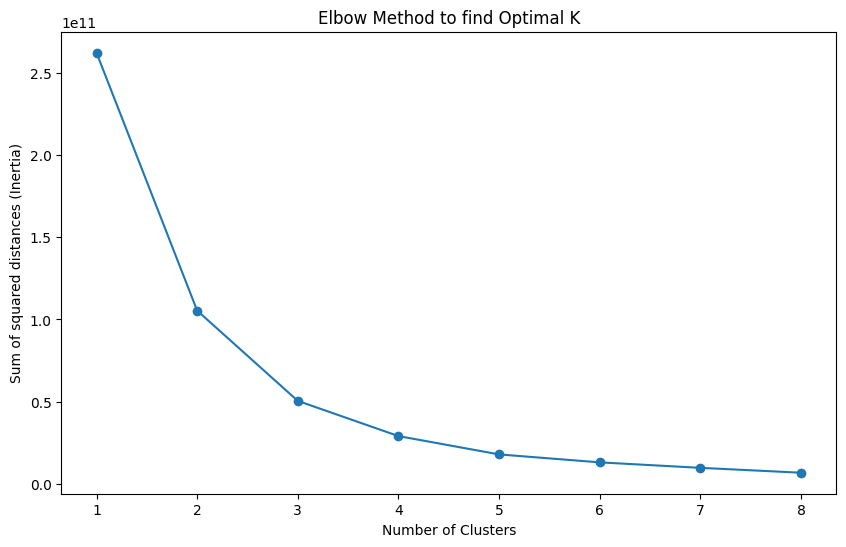

The optimal number of clusters is: 3


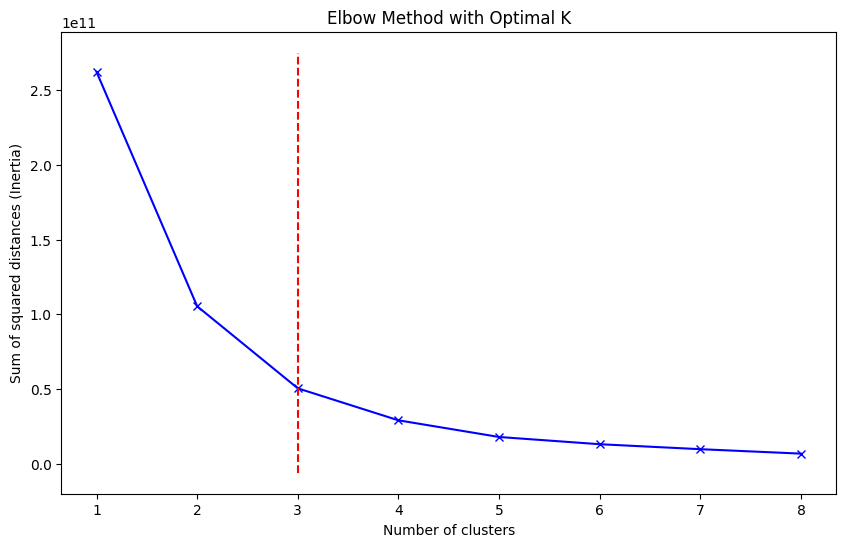

In [ ]:

!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
!pip install kneed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from kneed import KneeLocator


wcss = []
df_rfm_clustering = df_rfm.drop(columns='user_pseudo_id')


# Scale the features
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm_clustering)

max_clusters = 8
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++', n_init=15)
    kmeans.fit(df_rfm_clustering)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method to find Optimal K')
plt.show()

# Finding the elbow point using the Kneedle algorithm
K = range(1, max_clusters + 1)
kneedle = KneeLocator(K, wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

print(f"The optimal number of clusters is: {optimal_k}")

# Optional: Plot the elbow point on the graph
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bx-')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method with Optimal K')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=15, max_iter=100, random_state=30)
kmeans.fit(df_rfm_clustering)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df_rfm_clustering['cluster'] = cluster_labels

# Display the first 10 rows with cluster labels
print(df_rfm_clustering.head(10))

   recency  frequency  monetary  cluster
0       48          6   30517.0        1
1       48          0       0.0        0
2       48          5    1294.0        0
3       48          0       0.0        0
4       48          0       0.0        0
5       48          0       0.0        0
6       48          0       0.0        0
7       48          8   49500.0        1
8       48          0       0.0        0
9       48          0       0.0        0


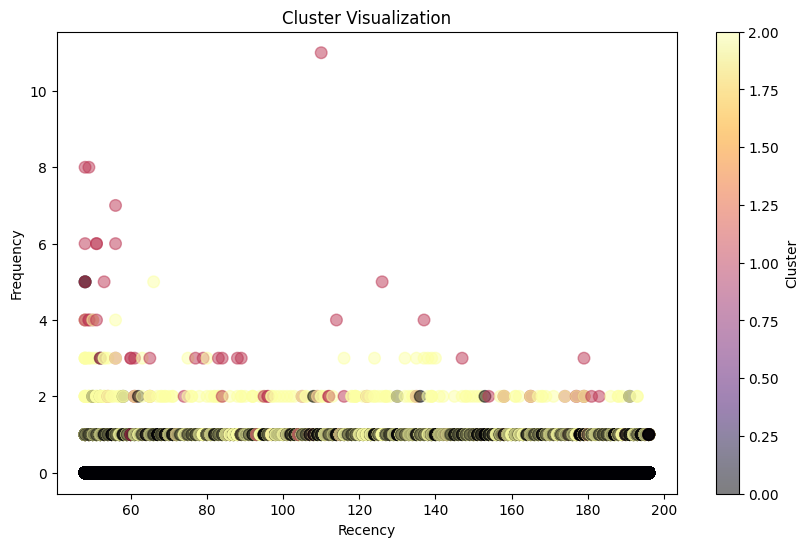

In [ ]:
# Plot the clusters using 'recency' and 'frequency'
plt.figure(figsize=(10, 6))
plt.scatter(df_rfm_clustering['recency'], df_rfm_clustering['frequency'], c=df_rfm_clustering['cluster'], cmap='inferno', s=70, alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

## rfm + other insights

In [ ]:
df_2 = df[['user_pseudo_id', 'recency', 'frequency', 'monetary','country','total_add_to_cart']]

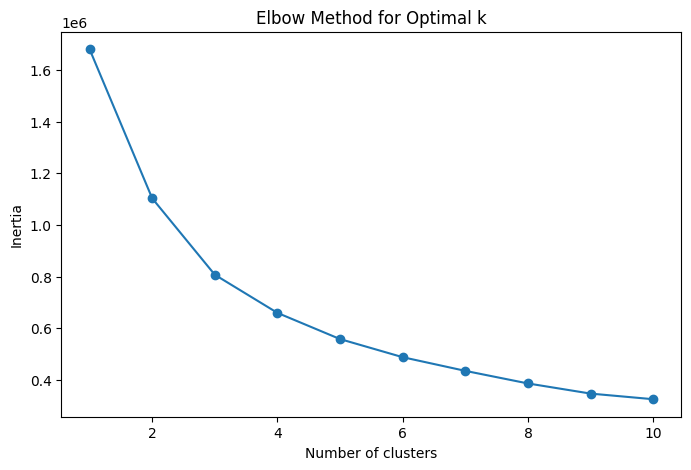

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['recency', 'frequency', 'monetary', 'total_add_to_cart']),
        ('cat', OneHotEncoder(), ['country'])])

# Extract features for clustering
features = df_2[['recency', 'frequency', 'monetary', 'total_add_to_cart', 'country']]

# Define the range of clusters to test
range_n_clusters = range(1, 11)

# Store the sum of squared distances for each k
inertia = []

# Perform clustering for each k and compute inertia
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=15, random_state=30)
    kmeans.fit(preprocessor.fit_transform(features))
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


<ipython-input-62-235b4ab6167a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['cluster'] = kmeans.fit_predict(preprocessor.transform(features))


In [ ]:
df_2.head(10)

,user_pseudo_id,recency,frequency,monetary,country,total_add_to_cart,cluster
0,1.310121e+09,48,6,30517.0,India,35,1
1,2.078225e+08,48,0,0.0,India,0,2
2,1.744403e+09,48,5,1294.0,United States,123,1
3,1.344726e+09,48,0,0.0,India,1,2
4,2.051523e+09,48,0,0.0,India,0,2
5,1.225513e+09,48,0,0.0,India,0,2
6,1.140088e+09,48,0,0.0,India,0,2
7,1.402624e+09,48,8,49500.0,India,61,1
8,8.246648e+08,48,0,0.0,India,0,2
9,2.813805e+08,48,0,0.0,India,0,2


from matplotlib import pyplot as plt
_df_0['user_pseudo_id'].plot(kind='hist', bins=20, title='user_pseudo_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['monetary'].plot(kind='hist', bins=20, title='monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['total_add_to_cart'].plot(kind='hist', bins=20, title='total_add_to_cart')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='user_pseudo_id', y='frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='frequency', y='monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='monetary', y='total_add_to_cart', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='total_add_to_cart', y='cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['recency']
  ys = series['user_pseudo_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('recency', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('recency')
_ = plt.ylabel('user_pseudo_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['recency']
  ys = series['frequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('recency', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('recency')
_ = plt.ylabel('frequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['recency']
  ys = series['monetary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('recency', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('recency')
_ = plt.ylabel('monetary')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['recency']
  ys = series['total_add_to_cart']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('recency', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('recency')
_ = plt.ylabel('total_add_to_cart')

from matplotlib import pyplot as plt
_df_13['user_pseudo_id'].plot(kind='line', figsize=(8, 4), title='user_pseudo_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['monetary'].plot(kind='line', figsize=(8, 4), title='monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['total_add_to_cart'].plot(kind='line', figsize=(8, 4), title='total_add_to_cart')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='user_pseudo_id', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='frequency', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='monetary', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='total_add_to_cart', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

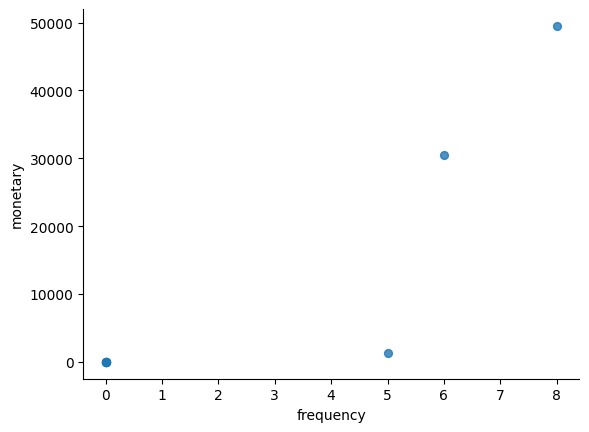

In [ ]:
from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='frequency', y='monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

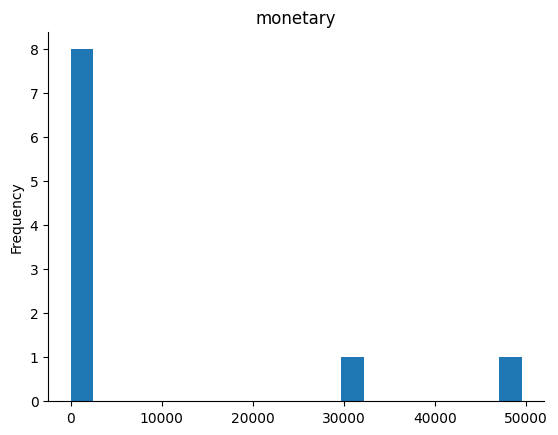

In [ ]:
from matplotlib import pyplot as plt
_df_2['monetary'].plot(kind='hist', bins=20, title='monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

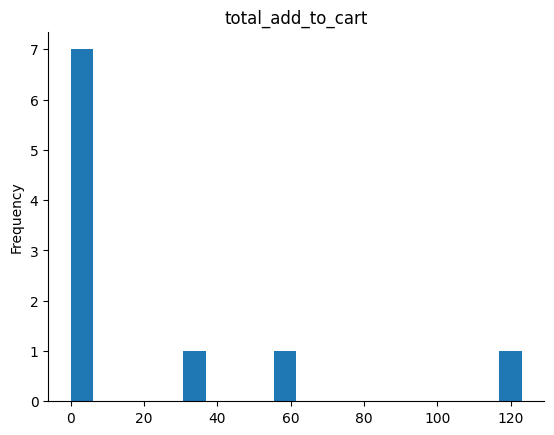

In [ ]:
from matplotlib import pyplot as plt
_df_3['total_add_to_cart'].plot(kind='hist', bins=20, title='total_add_to_cart')
plt.gca().spines[['top', 'right',]].set_visible(False)

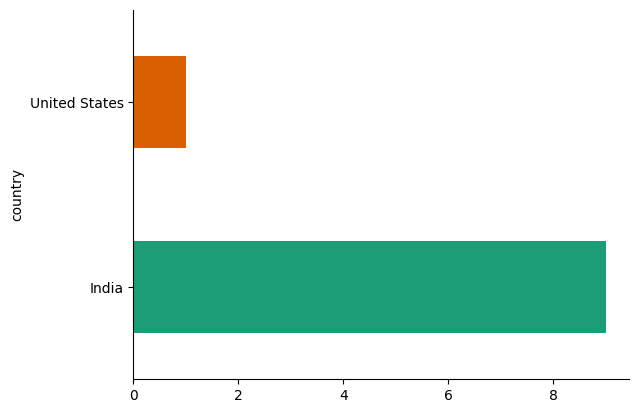

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Assuming the optimal number of clusters is k (replace with the actual number from the Elbow Method)
optimal_k = 4

# Define the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=15, random_state=30)

# Fit the model and predict cluster labels
df_2['cluster'] = kmeans.fit_predict(preprocessor.transform(features))

# Display the DataFrame with cluster labels
print(df_2)

<ipython-input-72-184eec7d9140>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['cluster'] = kmeans.fit_predict(preprocessor.transform(features))


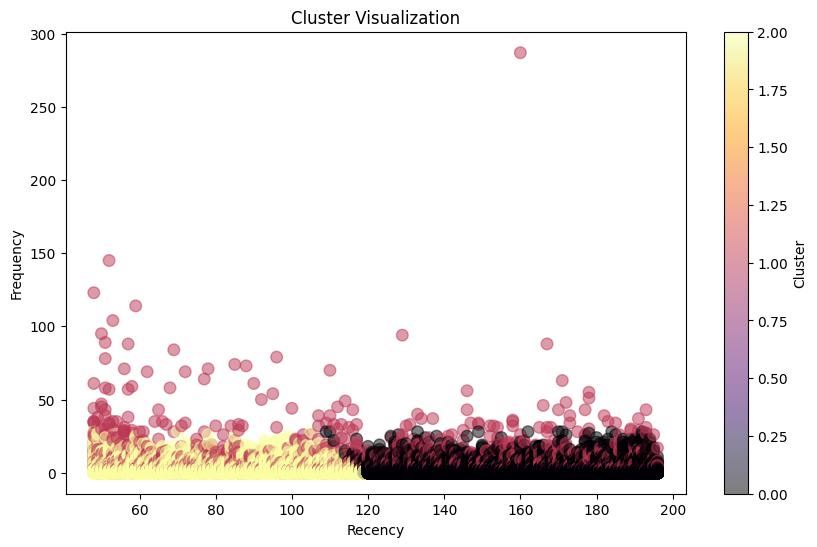

In [ ]:
# Plot the clusters using 'recency' and 'frequency'
plt.figure(figsize=(10, 6))
plt.scatter(df_2['recency'], df_2['total_add_to_cart'], c=df_2['cluster'], cmap='inferno', s=70, alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

# Preprocessing Data

In [ ]:
!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Columns to be encoded
columns_binary = ['city', 'country', 'region', 'metro','continent', 'sub_continent','Customer-Behaviour']
columns_to_normalize_only=["total_purchase_count","purchase_days","total_add_to_cart","total_begin_checkout",\
                           "total_product_views",'total_visits']
# 1. Apply One-Hot Encoding
#one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
#df_one_hot = pd.DataFrame(one_hot_encoder.fit_transform(df[columns_one_hot]), columns=one_hot_encoder.get_feature_names_out(columns_one_hot))
#df_one_hot.index = df.index  # Keep the original index

# 2. Apply Binary Encoding
binary_encoder = ce.BinaryEncoder(cols=columns_binary, return_df=True)
df_binary = binary_encoder.fit_transform(df[columns_binary])
df_rest=df[columns_to_normalize_only]

# 3. Combine the Encoded DataFrames
df_combined = pd.concat([df_binary,df_rest], axis=1)

# 4. Normalize the data (excluding 'user_pseudo_id' and 'latest_activity_date')
scaler = StandardScaler()

#Handle the missing values by filling them with the mean of the column
df_combined = df_combined.fillna(df_combined.mean()) # Fill missing values with the mean of each column

df_normalized = pd.DataFrame(scaler.fit_transform(df_combined), columns=df_combined.columns, index=df.index)

# 5. Ensure indexes match
df_user_activity = df[['user_pseudo_id', 'latest_activity_date']]

# Print the first 10 rows of the normalized DataFrame
print(df_normalized.head(10))

# Display the original DataFrame containing 'user_pseudo_id' and 'latest_activity_date'
print(df_user_activity.head(10))
df_user_activity.head(10)
df_normalized.head(10)
df_DBSCAN=df_normalized.copy()


     city_0    city_1    city_2    city_3    city_4    city_5    city_6  \
0 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
1 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
2 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
3 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
4 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
5 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
6 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
7 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
8 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
9 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   

     city_7    city_8    city_9  ...  sub_continent_3  sub_continent_4  \
0 -0.568647 -1.008972 -0.893384  ...        -0.324727         0.325398   
1 -0.568647 -1.008972 -0.8

## Analysis


1. Using K-Means Clustering:

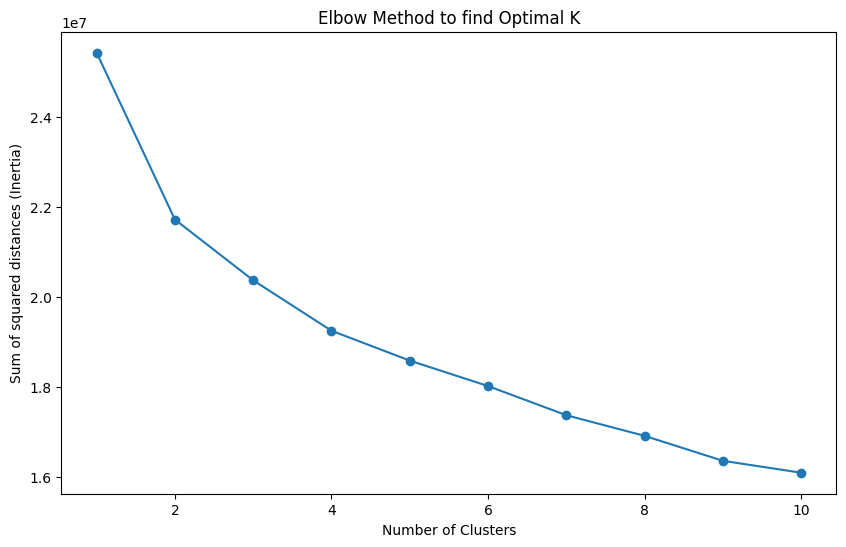

The optimal number of clusters is: 4


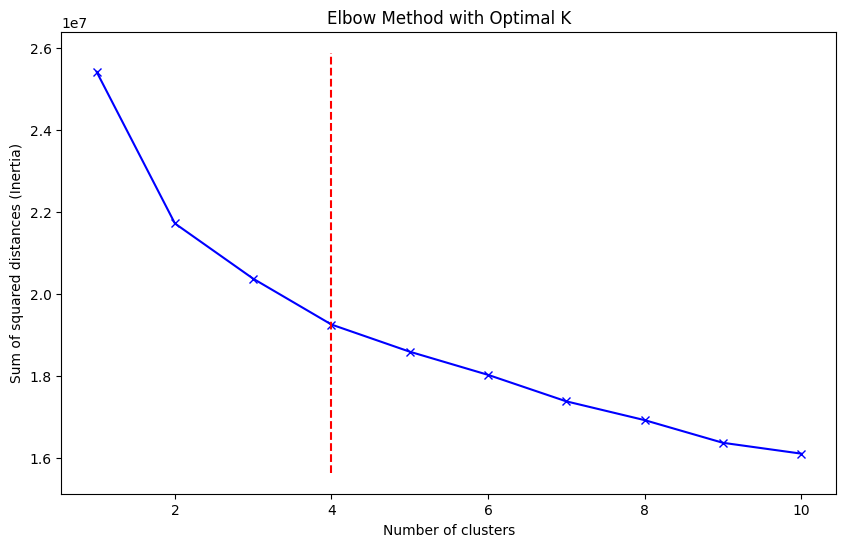

In [ ]:
!pip install kneed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
# Elbow Method
wcss = []

max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++', n_init=15)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method to find Optimal K')
plt.show()

# Finding the elbow point using the Kneedle algorithm
K = range(1, max_clusters + 1)
kneedle = KneeLocator(K, wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

print(f"The optimal number of clusters is: {optimal_k}")

# Optional: Plot the elbow point on the graph
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bx-')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method with Optimal K')
plt.show()

     city_0    city_1    city_2    city_3    city_4    city_5    city_6  \
0 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
1 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
2 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
3 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
4 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
5 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
6 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
7 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
8 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   
9 -0.104987 -0.147403 -0.193297 -0.238722 -0.324918 -0.433096 -0.491792   

     city_7    city_8    city_9  ...  sub_continent_4  Customer-Behaviour_0  \
0 -0.568647 -1.008972 -0.893384  ...         0.325398            -42.074373   
1 -0.568647 -1.0

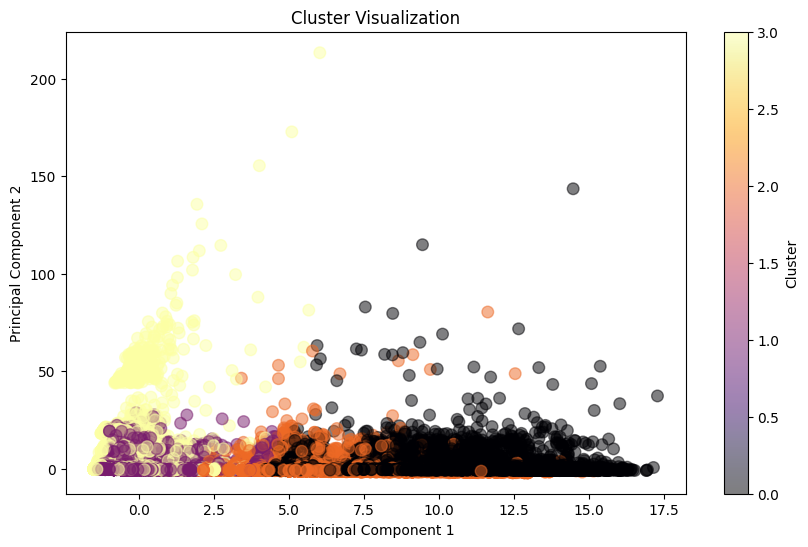

In [ ]:
# Initialize and fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=15, max_iter=100, random_state=30)
kmeans.fit(df_normalized)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df_normalized['cluster'] = cluster_labels

# Display the first 10 rows with cluster labels
print(df_normalized.head(10))

# Reduce dimensions using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized.drop(columns=['cluster']))
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='inferno', s=70, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()
